<a href="https://colab.research.google.com/github/SanjanaMohan34/MGMT_467_Team4/blob/main/Individual%20Notebooks/Unit1_LilyLarson_DIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery

## Key Performance Indicators

**Average Trip Duration**

In [ ]:
project_id = 'directed-bongo-471119-d1'
client = bigquery.Client(project=project_id)

sql = """
SELECT
    AVG(tripduration) AS avg_trip_duration
FROM
    `bigquery-public-data.new_york.citibike_trips`
"""

query_job = client.query(sql)
results = query_job.result()

for row in results:
    avg_trip_duration = row['avg_trip_duration']
    trip_dur_min = avg_trip_duration / 60
    print(f"Average Trip Duration: {avg_trip_duration:.2f} seconds")
    print(f"Average Trip Duration: {trip_dur_min:.2f} minutes")

Average Trip Duration: 933.75 seconds
Average Trip Duration: 15.56 minutes


**Number of Trips per Year**

In [ ]:
%%bigquery --project directed-bongo-471119-d1

SELECT EXTRACT(YEAR FROM starttime) AS trip_year, COUNT(*) AS num_trips
FROM `bigquery-public-data.new_york.citibike_trips`
GROUP BY trip_year
ORDER BY trip_year;

Query is running:   0%|          |

Downloading:   0%|          |

,trip_year,num_trips
0,2013,5037185
1,2014,8081216
2,2015,9937969
3,2016,10262649


**Most Popular Ending Station**

In [ ]:
%%bigquery --project directed-bongo-471119-d1
SELECT end_station_name, COUNT(*) AS trip_count
FROM `bigquery-public-data.new_york.citibike_trips`
GROUP BY end_station_name
ORDER BY trip_count DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,end_station_name,trip_count
0,E 17 St & Broadway,307500
1,W 21 St & 6 Ave,277831
2,Lafayette St & E 8 St,275154
3,West St & Chambers St,266036
4,8 Ave & W 31 St,253574
5,Broadway & E 14 St,243596
6,Broadway & E 22 St,240596
7,Cleveland Pl & Spring St,230735
8,Pershing Square North,230409
9,Greenwich Ave & 8 Ave,227556


# Year over Year Changes in KPIs

**Year over Year Growth of Average Trip Duration**

In [ ]:
%%bigquery --project directed-bongo-471119-d1
WITH YearlyAvgTripDuration AS (
    SELECT
        EXTRACT(YEAR FROM starttime) AS trip_year,
        AVG(tripduration) AS avg_trip_duration
    FROM
        `bigquery-public-data.new_york.citibike_trips`
    WHERE
        EXTRACT(YEAR FROM starttime) IS NOT NULL
    GROUP BY
        trip_year
)
SELECT
    trip_year,
    avg_trip_duration,
    (avg_trip_duration - LAG(avg_trip_duration, 1) OVER (ORDER BY trip_year)) AS year_over_year_change,
    SAFE_DIVIDE((avg_trip_duration - LAG(avg_trip_duration, 1) OVER (ORDER BY trip_year)), LAG(avg_trip_duration, 1) OVER (ORDER BY trip_year)) * 100 AS year_over_year_growth_percent,
    LAG(avg_trip_duration, 1) OVER (ORDER BY trip_year) AS prev_year_avg_trip_duration
FROM
    YearlyAvgTripDuration
ORDER BY
    trip_year;

Query is running:   0%|          |

Downloading:   0%|          |

,trip_year,avg_trip_duration,year_over_year_change,year_over_year_growth_percent,prev_year_avg_trip_duration
0,2013,887.638411,NaN,NaN,NaN
1,2014,851.175207,-36.463205,-4.107889,887.638411
2,2015,968.087654,116.912447,13.735415,851.175207
3,2016,988.149502,20.061848,2.072317,968.087654


**Year over Year Growth of Number of Trips**

In [ ]:
%%bigquery --project directed-bongo-471119-d1
WITH YearlyTripCount AS (
    SELECT
        EXTRACT(YEAR FROM starttime) AS trip_year,
        COUNT(*) AS num_trips
    FROM
        `bigquery-public-data.new_york.citibike_trips`
    WHERE
        EXTRACT(YEAR FROM starttime) IS NOT NULL
    GROUP BY
        trip_year
)
SELECT
    trip_year,
    num_trips,
    (num_trips - LAG(num_trips, 1) OVER (ORDER BY trip_year)) AS year_over_year_change,
    SAFE_DIVIDE((num_trips - LAG(num_trips, 1) OVER (ORDER BY trip_year)), LAG(num_trips, 1) OVER (ORDER BY trip_year)) * 100 AS year_over_year_growth_percent,
    LAG(num_trips, 1) OVER (ORDER BY trip_year) AS prev_year_num_trips
FROM
    YearlyTripCount
ORDER BY
    trip_year;

Query is running:   0%|          |

Downloading:   0%|          |

,trip_year,num_trips,year_over_year_change,year_over_year_growth_percent,prev_year_num_trips
0,2013,5037185,<NA>,NaN,<NA>
1,2014,8081216,3044031,60.431193,5037185
2,2015,9937969,1856753,22.976159,8081216
3,2016,10262649,324680,3.267066,9937969


# Trends

**Average Number of Trips per Month**

In [ ]:
%%bigquery --project directed-bongo-471119-d1
SELECT
    EXTRACT(MONTH FROM starttime) AS trip_month,
    COUNT(*) AS num_trips
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    starttime IS NOT NULL
GROUP BY
    trip_month
ORDER BY
    trip_month;

Query is running:   0%|          |

Downloading:   0%|          |

,trip_month,num_trips
0,1,1095430
1,2,982540
2,3,1700864
3,4,2336319
4,5,3040383
5,6,3338417
6,7,4278044
7,8,4702154
8,9,4926801
9,10,3078700


**Net Change in Bikes at a Station**

In [ ]:
%%bigquery --project directed-bongo-471119-d1
WITH StationActivity AS (
    SELECT
        start_station_name AS station_name,
        COUNT(*) AS num_starts
    FROM
        `bigquery-public-data.new_york.citibike_trips`
    WHERE
        start_station_name IS NOT NULL
    GROUP BY
        station_name
),
StationEnds AS (
    SELECT
        end_station_name AS station_name,
        COUNT(*) AS num_ends
    FROM
        `bigquery-public-data.new_york.citibike_trips`
    WHERE
        end_station_name IS NOT NULL
    GROUP BY
        station_name
)
SELECT
    sa.station_name,
    IFNULL(se.num_ends, 0) - IFNULL(sa.num_starts, 0) AS net_change_in_bikes
FROM
    StationActivity sa
FULL OUTER JOIN
    StationEnds se ON sa.station_name = se.station_name
ORDER BY
    net_change_in_bikes DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,station_name,net_change_in_bikes
0,W 33 St & 7 Ave,27421
1,DeKalb Ave & Hudson Ave,19419
2,E 17 St & Broadway,15885
3,W 51 St & 6 Ave,15211
4,12 Ave & W 40 St,12788
5,Pearl St & Hanover Square,11406
6,W 41 St & 8 Ave,10263
7,W Broadway & Spring St,10088
8,W 20 St & 11 Ave,9138
9,W 14 St & The High Line,8664


# Product Category - Most Popular Routes

In [ ]:
%%bigquery popular_routes_df --project directed-bongo-471119-d1
SELECT
    start_station_name,
    end_station_name,
    COUNT(*) AS route_count
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    start_station_name IS NOT NULL AND end_station_name IS NOT NULL
GROUP BY
    start_station_name,
    end_station_name
ORDER BY
    route_count DESC
LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
popular_routes_df.head()

,start_station_name,end_station_name,route_count
0,Central Park S & 6 Ave,Central Park S & 6 Ave,47215
1,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,18292
2,Broadway & W 60 St,Broadway & W 60 St,16626
3,Centre St & Chambers St,Centre St & Chambers St,13979
4,12 Ave & W 40 St,West St & Chambers St,12417


In [ ]:
# Get the top 5 routes from the DataFrame
top_5_routes = popular_routes_df.head(5)

# Create a list of tuples for the popular routes
popular_route_list = list(top_5_routes[['start_station_name', 'end_station_name']].itertuples(index=False, name=None))

# Construct the WHERE clause for the SQL query
where_clause = " OR ".join([f"(start_station_name = '{start}' AND end_station_name = '{end}')" for start, end in popular_route_list])

# Construct the full SQL query
sql_query = f"""
SELECT
    start_station_name,
    end_station_name,
    birth_year,
    starttime
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    birth_year IS NOT NULL AND birth_year > 1900 AND ({where_clause})
"""

In [ ]:
from google.cloud import bigquery

project_id = 'directed-bongo-471119-d1'
client = bigquery.Client(project=project_id)

query_job = client.query(sql_query)
trips_for_popular_routes_df = query_job.to_dataframe()

display(trips_for_popular_routes_df.head())

,start_station_name,end_station_name,birth_year,starttime
0,Central Park S & 6 Ave,Central Park S & 6 Ave,1947,2013-11-11 10:34:39+00:00
1,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2016-09-12 10:58:08+00:00
2,Central Park S & 6 Ave,Central Park S & 6 Ave,1996,2016-09-04 17:46:54+00:00
3,Central Park S & 6 Ave,Central Park S & 6 Ave,1995,2016-08-01 16:55:17+00:00
4,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2014-12-28 16:03:00+00:00


In [ ]:
import pandas as pd
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Calculate the age for each trip
trips_for_popular_routes_df['age'] = current_year - trips_for_popular_routes_df['birth_year']

# Display the DataFrame with the new age column
display(trips_for_popular_routes_df.head())

,start_station_name,end_station_name,birth_year,age
0,Central Park S & 6 Ave,Central Park S & 6 Ave,1951,74
1,Central Park S & 6 Ave,Central Park S & 6 Ave,1996,29
2,Central Park S & 6 Ave,Central Park S & 6 Ave,1995,30
3,Central Park S & 6 Ave,Central Park S & 6 Ave,1946,79
4,Central Park S & 6 Ave,Central Park S & 6 Ave,1995,30


In [ ]:
# Group the DataFrame by start and end station names
grouped_by_route = trips_for_popular_routes_df.groupby(['start_station_name', 'end_station_name'])

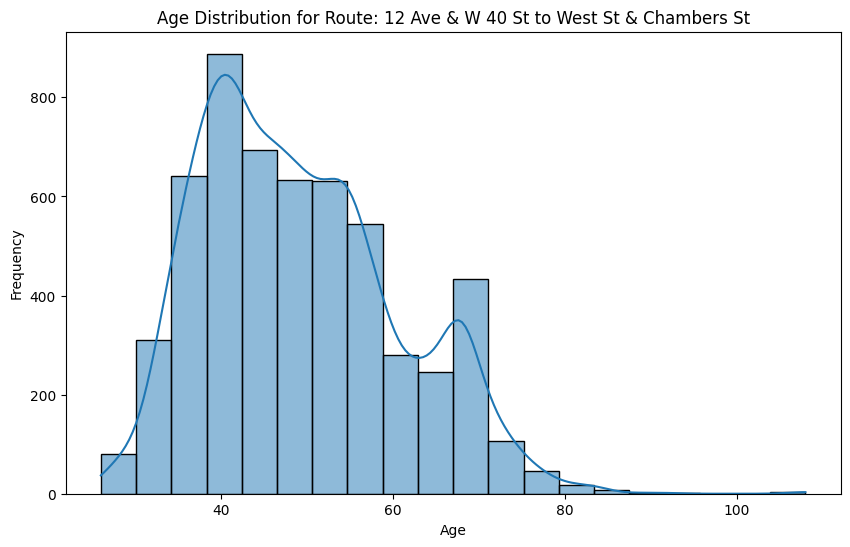

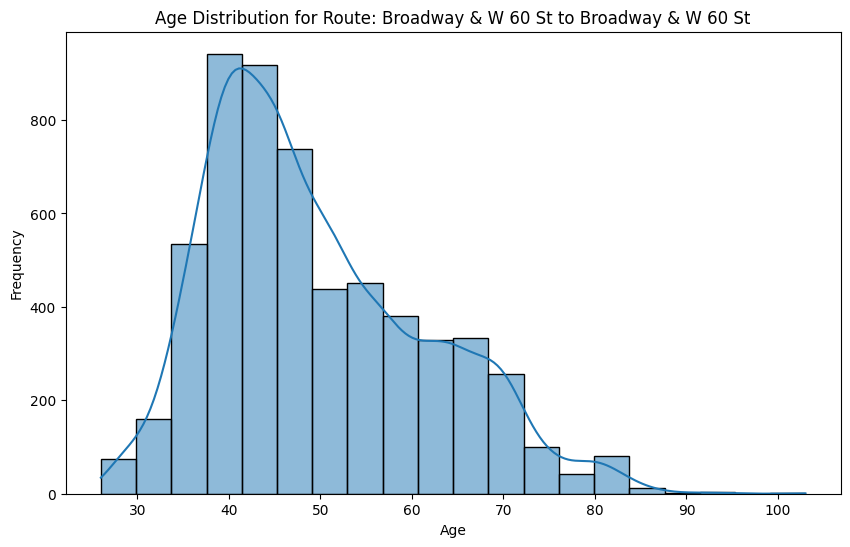

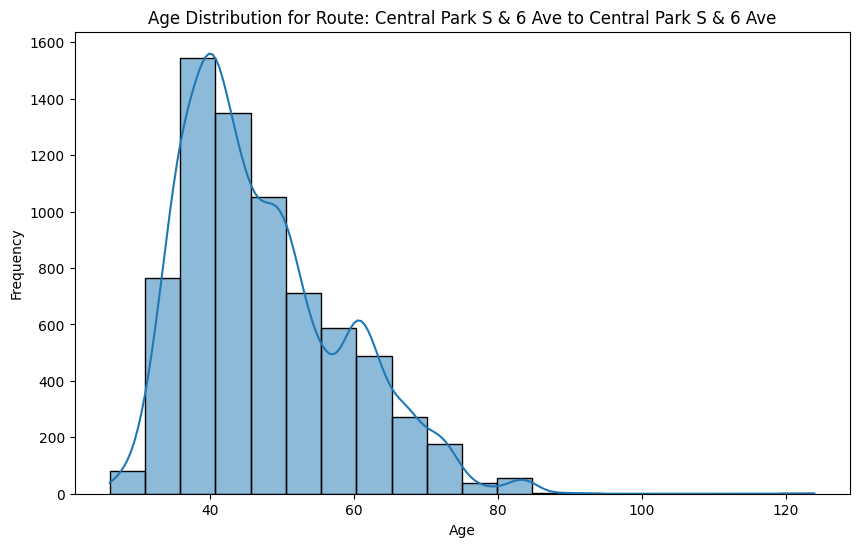

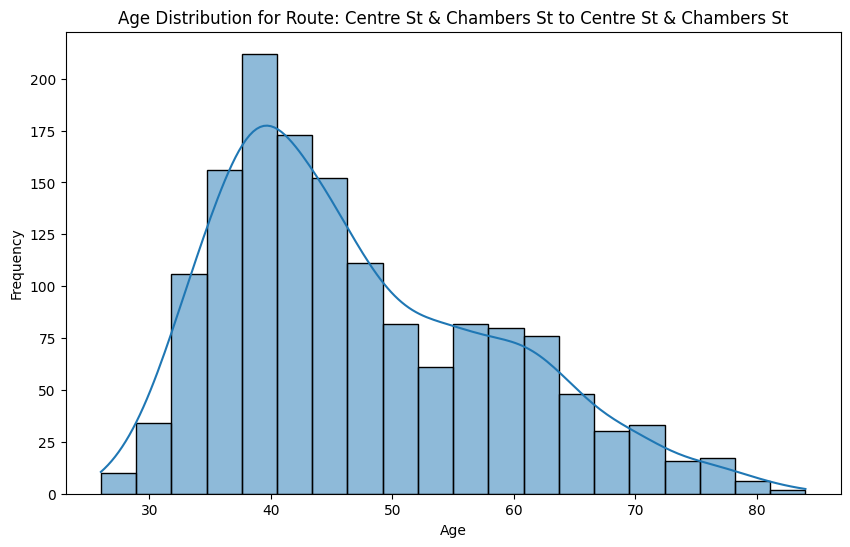

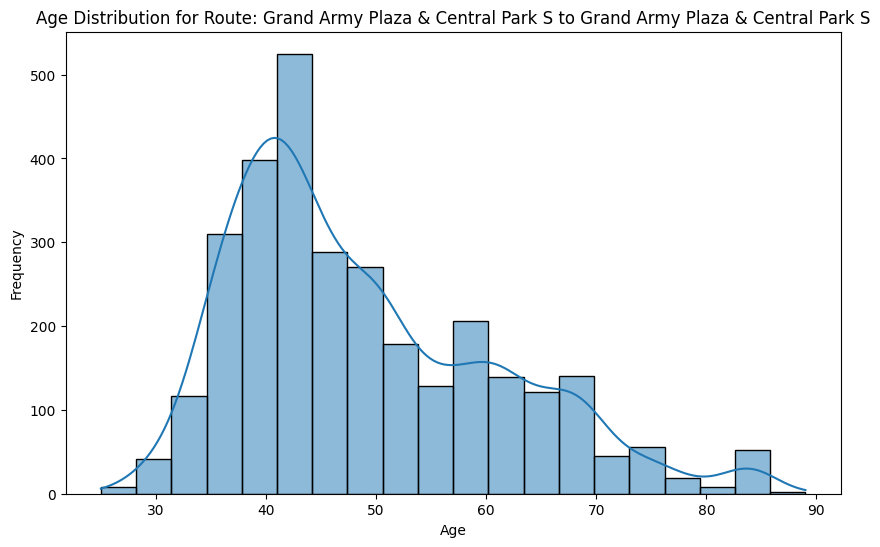

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age distributions for each route
for name, group in grouped_by_route:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=group, x='age', kde=True, bins=20)
    plt.title(f'Age Distribution for Route: {name[0]} to {name[1]}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Customer Segment - Gender

In [ ]:
%%bigquery gender_counts_df --project directed-bongo-471119-d1
SELECT
    gender,
    COUNT(*) AS num_riders
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    gender IS NOT NULL
GROUP BY
    gender;

Query is running:   0%|          |

Downloading:   0%|          |

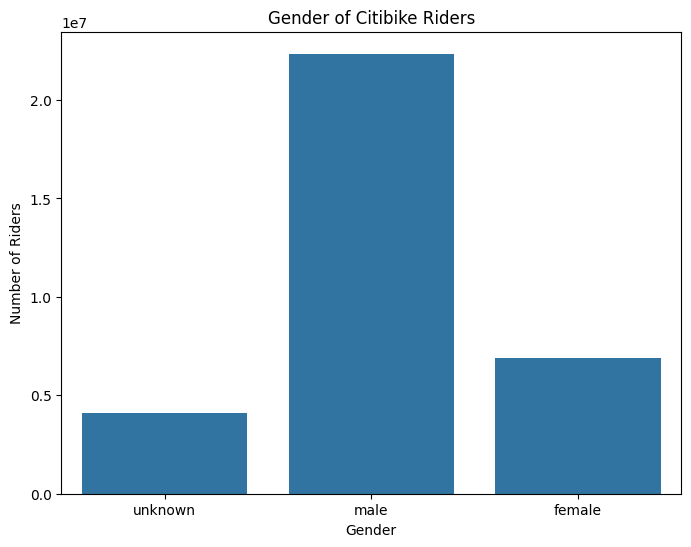

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map gender codes to labels (1: Male, 2: Female)
#gender_counts_df['gender_label'] = gender_counts_df['gender'].map({1: 'male', 2: 'female', 3: 'unknown'})

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='num_riders', data=gender_counts_df)
plt.title('Gender of Citibike Riders')
plt.xlabel('Gender')
plt.ylabel('Number of Riders')
plt.show()

# Validate

**Cross Checks - Alternative Queries**

Cross-check for Average Trip Duration: Calculate Median Trip Duration

In [ ]:
%%bigquery --project directed-bongo-471119-d1
WITH ordered_trip_dur AS (
  SELECT tripduration,
  ROW_NUMBER() OVER (ORDER BY tripduration) AS row_num,
  COUNT(*) OVER () AS total_rows
  FROM `bigquery-public-data.new_york.citibike_trips`
)
SELECT AVG(tripduration) as median_trip_duration
FROM ordered_trip_dur
WHERE row_num IN (FLOOR((total_rows + 1) / 2), FLOOR((total_rows + 2) / 2));

Query is running:   0%|          |

Downloading:   0%|          |

,median_trip_duration
0,633.0


Cross-check for Most Popular Ending Station: Calculate Most Popular Starting Station

In [ ]:
%%bigquery --project directed-bongo-471119-d1
SELECT
    start_station_name,
    COUNT(*) AS trip_count
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    start_station_name IS NOT NULL
GROUP BY
    start_station_name
ORDER BY
    trip_count DESC
LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,trip_count
0,E 17 St & Broadway,291615
1,8 Ave & W 31 St,291577
2,Lafayette St & E 8 St,277060
3,W 21 St & 6 Ave,275348
4,West St & Chambers St,260911
5,Pershing Square North,246181
6,Broadway & E 14 St,244420
7,Broadway & E 22 St,237394
8,Cleveland Pl & Spring St,229694
9,8 Ave & W 33 St,223970


**Inaccurate Age Calculation**

In the Product Category Segment, age of customers was calcuated using: current_year - birth_year. While this correctly calculates the current age of the customer, it does not accurately represent their age at the time they took a ride on one of New York's CitiBikes. We want to know the ages of our customers at the time of their trips, so we will adjust the calculation below.




In [ ]:
import pandas as pd

# Ensure the 'starttime' column is in datetime format (if it's not already)
trips_for_popular_routes_df['starttime'] = pd.to_datetime(trips_for_popular_routes_df['starttime'])

# Extract the year from the 'starttime' column
trips_for_popular_routes_df['start_year'] = trips_for_popular_routes_df['starttime'].dt.year

# Display the DataFrame with the new 'start_year' column
display(trips_for_popular_routes_df.head())

,start_station_name,end_station_name,birth_year,starttime,start_year
0,Central Park S & 6 Ave,Central Park S & 6 Ave,1947,2013-11-11 10:34:39+00:00,2013
1,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2016-09-12 10:58:08+00:00,2016
2,Central Park S & 6 Ave,Central Park S & 6 Ave,1996,2016-09-04 17:46:54+00:00,2016
3,Central Park S & 6 Ave,Central Park S & 6 Ave,1995,2016-08-01 16:55:17+00:00,2016
4,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2014-12-28 16:03:00+00:00,2014


In [ ]:
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Calculate the age for each trip
trips_for_popular_routes_df['age'] = trips_for_popular_routes_df['start_year'] - trips_for_popular_routes_df['birth_year']

# Display the DataFrame with the new age column
display(trips_for_popular_routes_df.head())

,start_station_name,end_station_name,birth_year,starttime,start_year,age
0,Central Park S & 6 Ave,Central Park S & 6 Ave,1947,2013-11-11 10:34:39+00:00,2013,66
1,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2016-09-12 10:58:08+00:00,2016,75
2,Central Park S & 6 Ave,Central Park S & 6 Ave,1996,2016-09-04 17:46:54+00:00,2016,20
3,Central Park S & 6 Ave,Central Park S & 6 Ave,1995,2016-08-01 16:55:17+00:00,2016,21
4,Central Park S & 6 Ave,Central Park S & 6 Ave,1941,2014-12-28 16:03:00+00:00,2014,73


In [ ]:
# Group the DataFrame by start and end station names
grouped_by_route = trips_for_popular_routes_df.groupby(['start_station_name', 'end_station_name'])

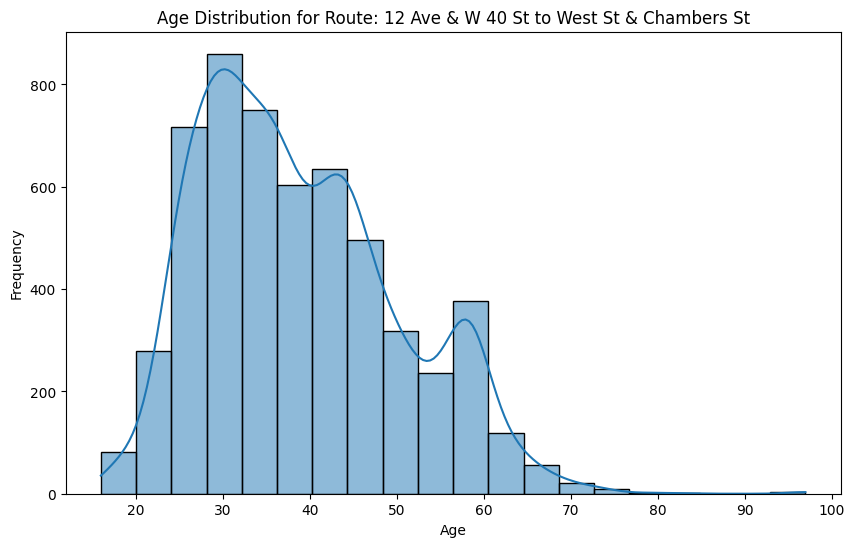

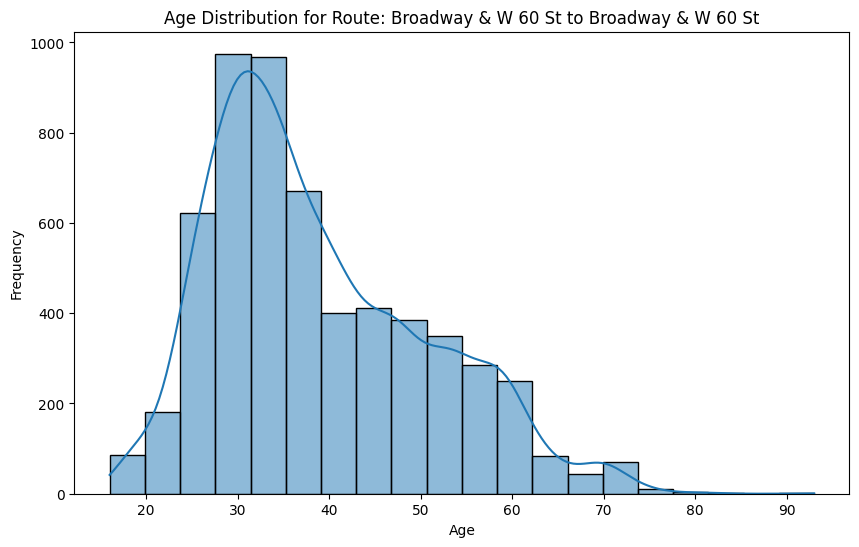

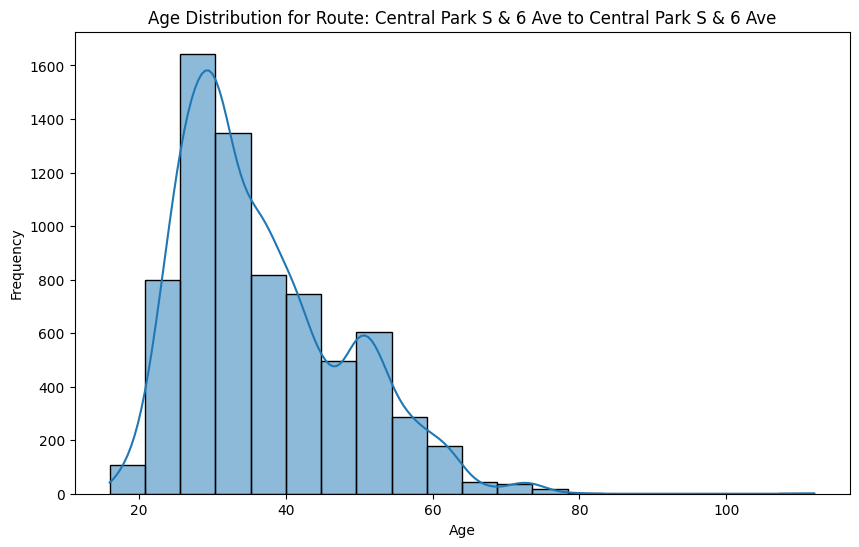

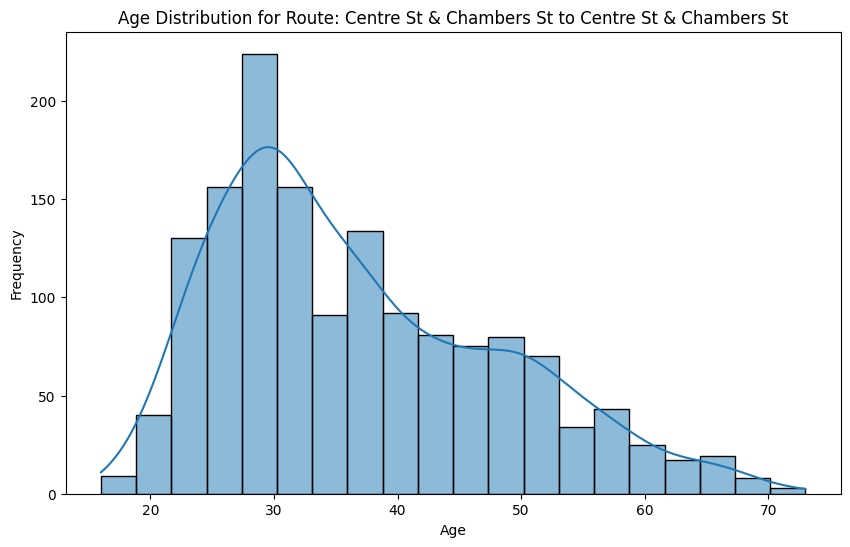

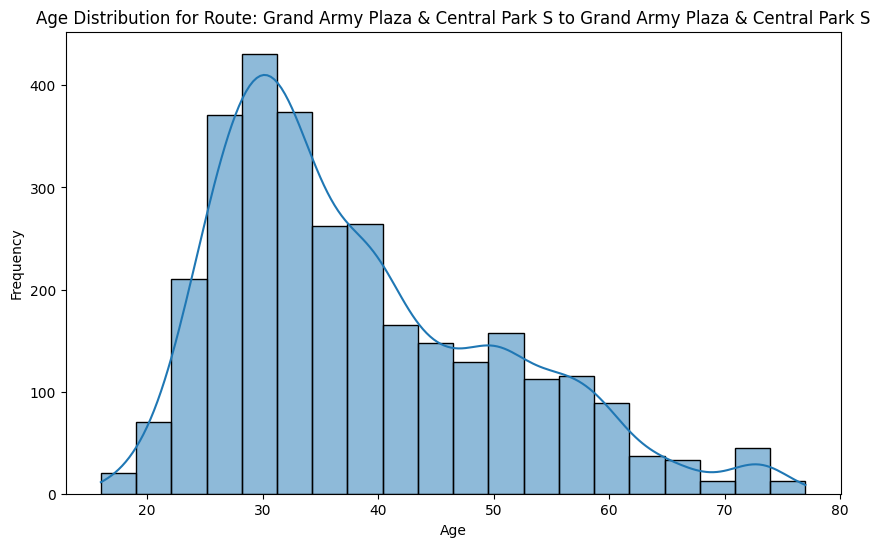

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age distributions for each route
for name, group in grouped_by_route:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=group, x='age', kde=True, bins=20)
    plt.title(f'Age Distribution for Route: {name[0]} to {name[1]}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Extend

**Create an interactive plotly chart to display the distribution of tripduration in minutes for a given route (unique combination of start_station_id and end_station_id).**

In [ ]:
# Define the start and end station IDs for the chosen route
target_start_station_id = 2006
target_end_station_id = 2006

In [ ]:
sql_tripduration = f"""
SELECT
    tripduration
FROM
    `bigquery-public-data.new_york.citibike_trips`
WHERE
    start_station_id = {target_start_station_id} AND end_station_id = {target_end_station_id}
"""

query_job = client.query(sql_tripduration)

In [ ]:
tripduration_df = query_job.to_dataframe()
display(tripduration_df.head())

,tripduration
0,1302
1,1901
2,3463
3,3836
4,3356


In [ ]:
#transform trip duration to minutes
tripduration_df['tripduration_minutes'] = tripduration_df['tripduration'] / 60
display(tripduration_df.head())

,tripduration,tripduration_minutes
0,1302,21.7
1,1901,31.683333
2,3463,57.716667
3,3836,63.933333
4,3356,55.933333


In [ ]:
import plotly.express as px
fig = px.histogram(tripduration_df, x='tripduration_minutes', title=f'Trip Duration for Route {target_start_station_id} to {target_end_station_id} [excluded over 100 minutes]')
fig.update_layout(xaxis_title='Trip Duration (minutes)', yaxis_title='Frequency')
fig.update_layout(xaxis_range=[0,100])
fig.show()

**Recommendations**



*   We should focus advertising efforts toward the female demographic, since the majority of our customers are male.  
*   We need to ensure the appropriate number of bikes are stocked at each of our stations, taking into account the most popular routes and an imbalance created by different popular start stations and end stations (bikes being deposited in one place and needed to meet demand in another).


